In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('Telco_churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.duplicated().sum()


0

In [7]:
data = data.loc[~data['TotalCharges'].str.contains(' ')]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208
std,0.368844,24.545260,30.085974
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.587500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.862500
max,1.000000,72.000000,118.750000


In [10]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')
data['TotalCharges'] = data['TotalCharges'].astype('float64')

In [11]:
numerical_features = []
categorical_features = []

for i in data.columns:
    if (data[i].dtype == 'object'):
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [12]:
numerical_features, categorical_features

(['tenure', 'MonthlyCharges', 'TotalCharges'],
 ['customerID',
  'gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn'])

In [13]:
data['MonthlyCharges'].dtype

dtype('float64')

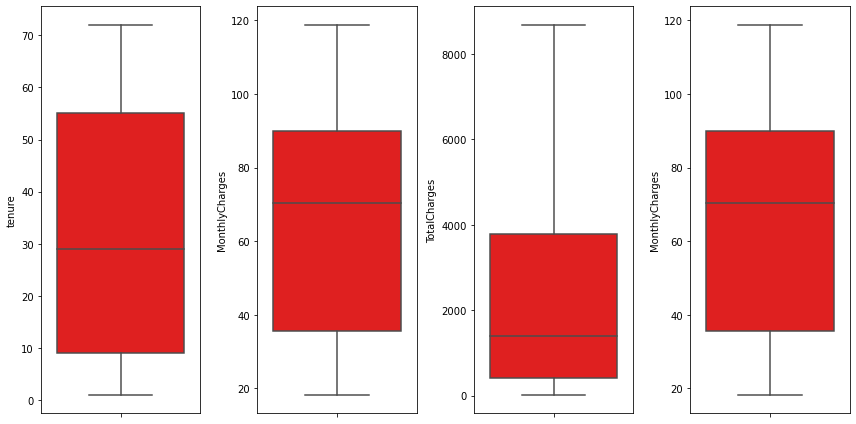

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# adjust the figure size for better readability
plt.figure(figsize=(12,6))
numerical_features.append('MonthlyCharges')
features = numerical_features
# plotting
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

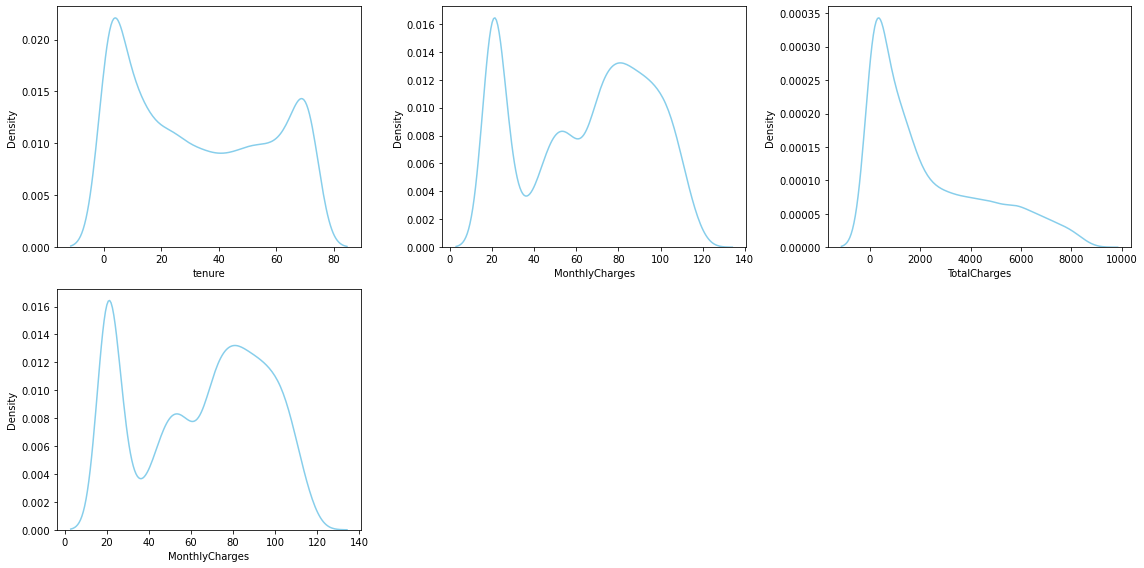

In [15]:
plt.figure(figsize=(16,8))

features = numerical_features
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x = data[features[i]], color = 'skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

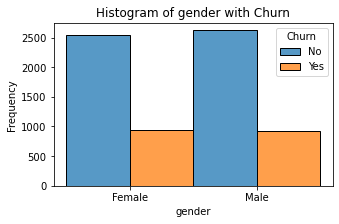

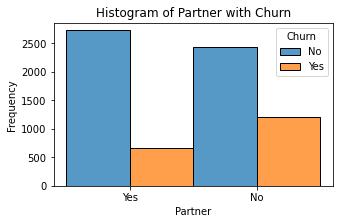

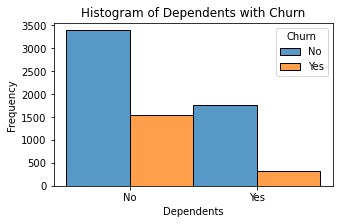

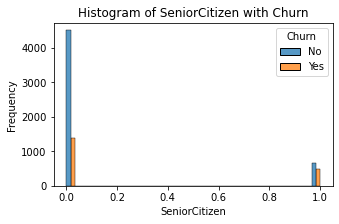

In [16]:
def create_histograms(df, features):
    for feature in features:
        plt.figure(figsize=(5, 3))
        sns.histplot(data = df, x = feature, hue = 'Churn', multiple = 'dodge', bins=30)
        plt.title(f'Histogram of {feature} with Churn')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

features = ["gender","Partner","Dependents","SeniorCitizen"]
create_histograms(data, features)

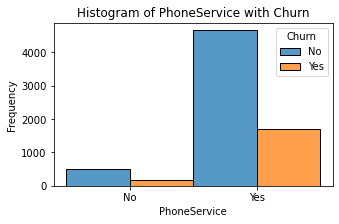

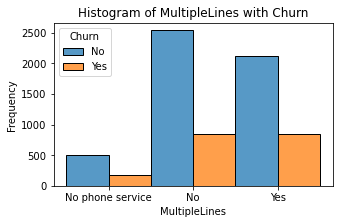

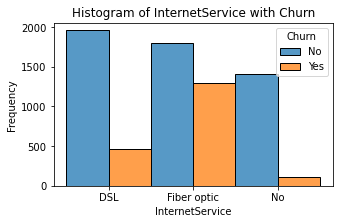

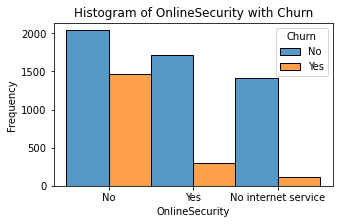

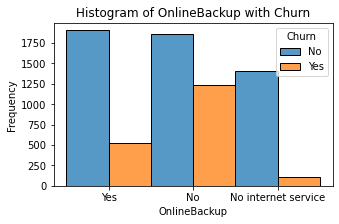

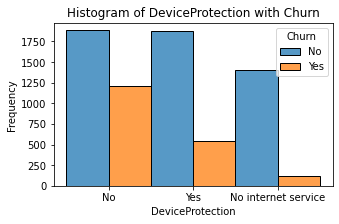

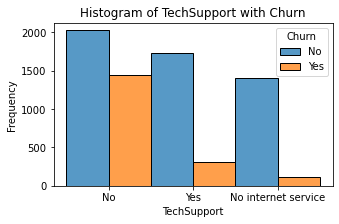

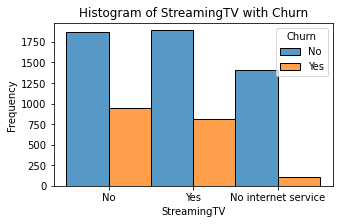

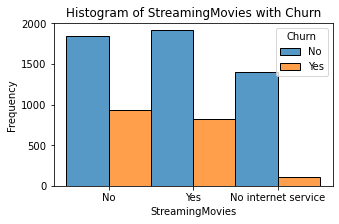

In [17]:
features = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
create_histograms(data, features)

### Feature Engineering

In [18]:
for i in categorical_features:
    print(f'Column: {i} \n, {data[i].value_counts()}')

Column: customerID 
, 7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64
Column: gender 
, Male      3549
Female    3483
Name: gender, dtype: int64
Column: SeniorCitizen 
, 0    5890
1    1142
Name: SeniorCitizen, dtype: int64
Column: Partner 
, No     3639
Yes    3393
Name: Partner, dtype: int64
Column: Dependents 
, No     4933
Yes    2099
Name: Dependents, dtype: int64
Column: PhoneService 
, Yes    6352
No      680
Name: PhoneService, dtype: int64
Column: MultipleLines 
, No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Column: InternetService 
, Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
Column: OnlineSecurity 
, No                     3497
Yes                    2015
No internet service    1520
Name: O

In [19]:
categorical_features

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [20]:
# categorical_features.remove('customerID')

In [21]:
data['Churn'] = [1 if i == 'Yes' else 0 for i in data['Churn']]

In [22]:
y = data['Churn']

In [23]:
X = data.drop(['Churn', 'customerID'], axis=1)


In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder



encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features[1:-1]])

# X_encoded
# Scaling numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])


In [25]:
X_processed = pd.concat([pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names(categorical_features[1:-1])),
                         pd.DataFrame(X_scaled, columns=numerical_features)], axis=1)


/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
X_processed.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,MonthlyCharges
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-1.280248,-1.161694,-0.994194,-1.161694
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.064303,-0.260878,-0.173740,-0.260878
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-1.239504,-0.363923,-0.959649,-0.363923
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.512486,-0.747850,-0.195248,-0.747850
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-1.239504,0.196178,-0.940457,0.196178


In [30]:
duplicated_columns = X.columns[X.columns.duplicated(keep=False)]
for col in duplicated_columns:
    index = 1
    while f"{col}_{index}" in X.columns:
        index += 1
    X.rename(columns={col: f"{col}_{index}"}, inplace=True)



In [31]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import Random
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define the XGBoost model
model = xgb.XGBClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

#Test model accuracy
acc = accuracy_score(y_test, y_pred)
acc

ValueError: feature_names must be unique